In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('./kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


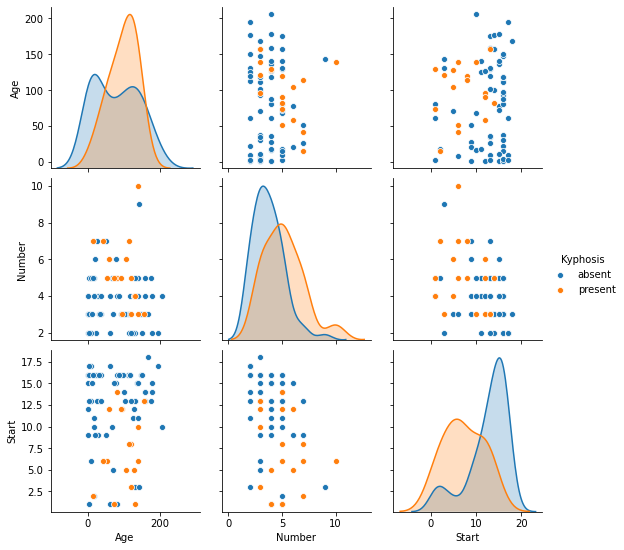

In [6]:
sns.pairplot(df, hue='Kyphosis')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(confusion_matrix(y_test, y_pred))

[[15  5]
 [ 1  4]]


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.94      0.75      0.83        20
     present       0.44      0.80      0.57         5

    accuracy                           0.76        25
   macro avg       0.69      0.78      0.70        25
weighted avg       0.84      0.76      0.78        25



In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=200)

In [21]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [22]:
rfc_pred = rfc.predict(X_test)

In [23]:
print(confusion_matrix(y_test, rfc_pred))

[[16  4]
 [ 4  1]]


In [24]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.80      0.80      0.80        20
     present       0.20      0.20      0.20         5

    accuracy                           0.68        25
   macro avg       0.50      0.50      0.50        25
weighted avg       0.68      0.68      0.68        25



In [26]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [27]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64